In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data_df= pd.read_csv('model_feats/data.csv')

In [3]:
feats_df= pd.read_csv('model_feats/feats.csv')
target_df= pd.read_csv('model_feats/target.csv')
# target= np.array(target_df).squeeze()
Npts= len(target_df)
print "Total number of data points: %d" % Npts
print "Total number of features: %d" % len(feats_df.columns)

Total number of data points: 4803
Total number of features: 35


In [4]:
county_df= target_df.loc[:,['County','Year']]
target_df= target_df['Rate (per 10k)']

In [5]:
target_df.head()

0    448.28
1    708.98
2    221.79
3    254.14
4     51.37
Name: Rate (per 10k), dtype: float64

In [6]:
feats_df.columns

Index([u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian',
       u'Hispanic', u'Other', u'Good AQI', u'Moderate AQI', u'Unhealthy AQI',
       u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Area burned percent', u'Foreign born (%)',
       u'Persons per household', u'Bachelor or higher (%)',
       u'Persons without health insurance (%)', u'Median household income',
       u'Persons in poverty (%)', u'Population per square mile',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Unemployment (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)',
       u'Other (%)', u'Radon Zone', u'Population near busy roads (%)'],
      dtype='object')

In [7]:
cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
       u'Good AQI', u'Moderate AQI', u'Unhealthy AQI', u'AQI Median',
       u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
       u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Foreign born (%)', u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
       u'Median household income', u'Unemployment (%)', u'Persons in poverty (%)', u'Bachelor or higher (%)']

In [8]:
feats_df= feats_df.reindex(columns=cols)

In [9]:
feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Good AQI,Moderate AQI,Unhealthy AQI,...,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%),Persons in poverty (%),Bachelor or higher (%)
0,1,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7,11.5,43.0
1,1,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7,11.5,43.0
2,0,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7,11.5,43.0
3,0,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7,11.5,43.0
4,1,0,0,0,1,0,0,0.679452,0.282192,0.038356,...,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7,11.5,43.0


In [10]:
corr= feats_df.corr()

In [ ]:
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

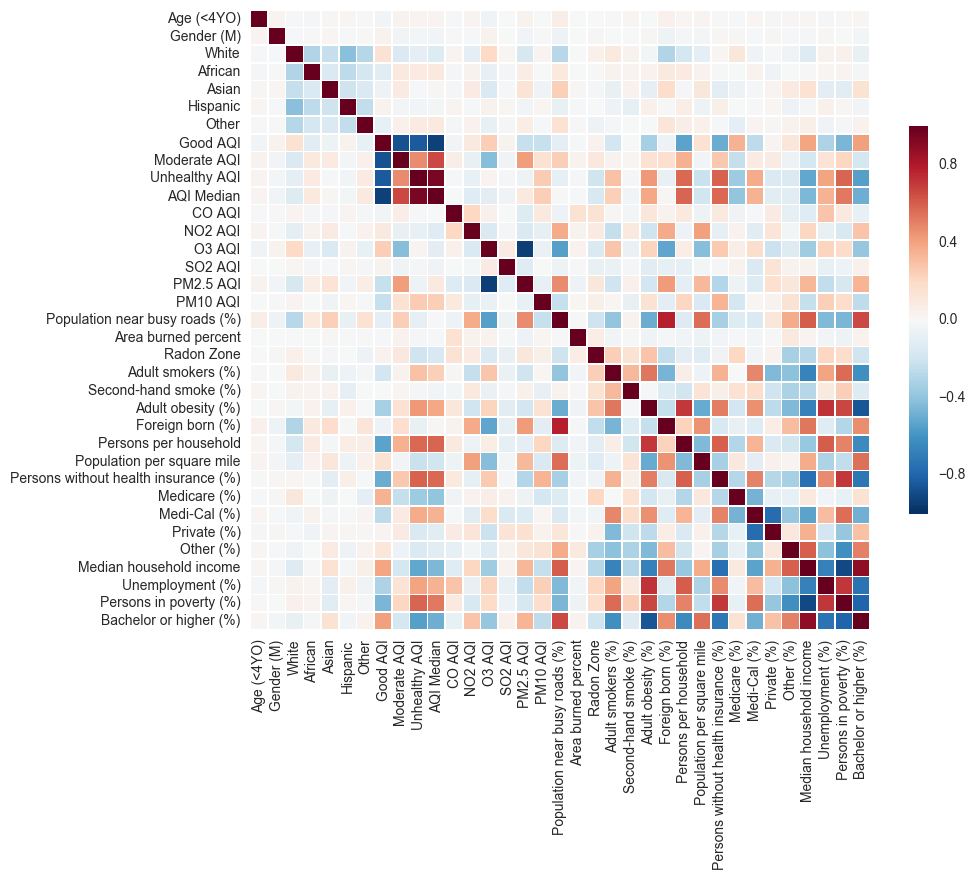

In [13]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
# sns.heatmap(corr,mask=mask,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5},ax=ax)
sns.heatmap(corr,vmax=1,vmin=-1,square=True,linewidths=.5,cbar_kws={"shrink": .5},ax=ax)

Remove Good/Moderate/Unhealthy AQI

Remove Bachelor or higher and Persons in poverty

In [18]:
cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
       u'AQI Median',
       u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
       u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Foreign born (%)', u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
       u'Median household income', u'Unemployment (%)']

In [21]:
feats_df= feats_df.reindex(columns=cols)

In [22]:
corr= feats_df.corr()

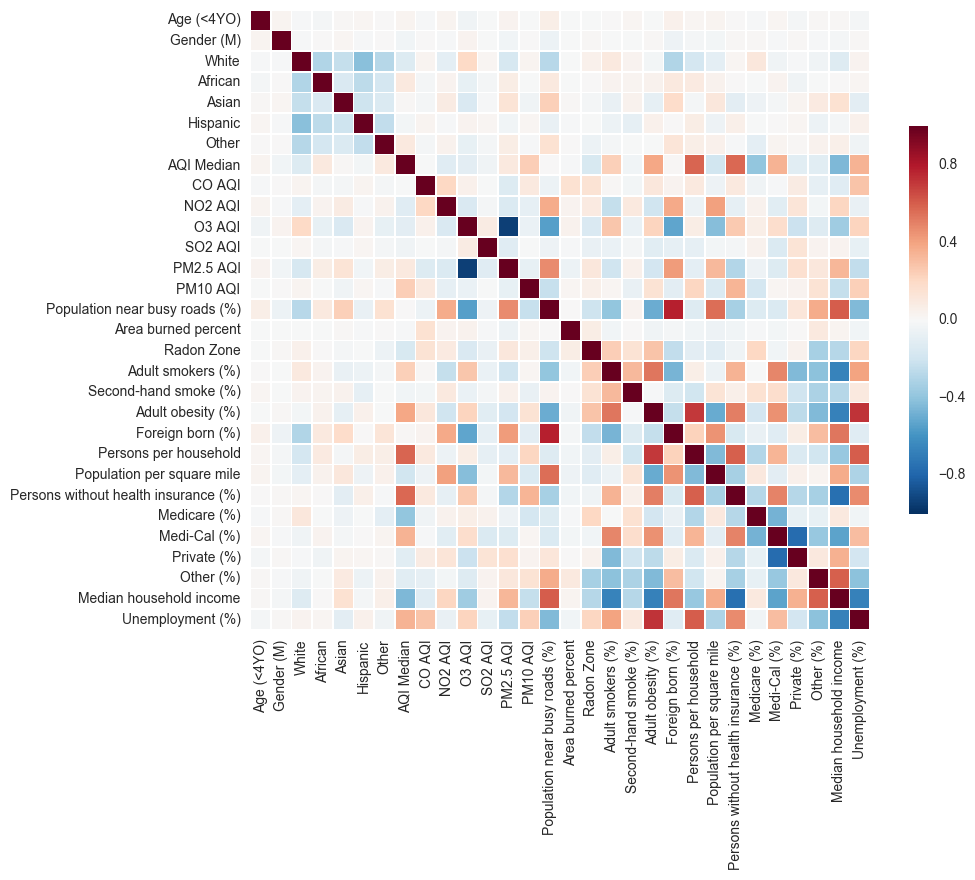

In [23]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
# sns.heatmap(corr,mask=mask,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5},ax=ax)
sns.heatmap(corr,vmax=1,vmin=-1,square=True,linewidths=.5,cbar_kws={"shrink": .5},ax=ax)